In [1]:
#Install Dependencies
!pip install casadi

import numpy as np
import casadi as ca
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 5.7 MB/s eta 0:00:00


Welcome to CasADi! Your goal in this homework is to get all three optimization problems set up and running. Note that the first one is done for you, with (hopefully) informative explanatory comments.

In [2]:
# Problem 1 Setup

# Initial Conditions
t0 = 0
x0 = 0
xdot0 = 0

# Final Conditions
tf = 7
xf = 10
xdotf = 0

# Discretization timestep
dt = 0.01

# How many timesteps we will be using over the complete horizon
T = int((tf-t0)/dt)

# Linear dynamics matrices (not applicable for the next problems)
A = np.array([[1, dt],[0, 1]])
b = np.array([[0], [dt]])



In [3]:
# Problem 1 Optimization

# Define our optimization problem object using ca.Opti()
opti_1 = ca.Opti()

# Define our variables that we'll be optimizing over
x = opti_1.variable(2, T)
u = opti_1.variable(T-1)

# Define our initial condition constraint
opti_1.subject_to(x[0, 0] == x0)
opti_1.subject_to(x[1, 0] == xdot0)

for i in range(T-1):
  # Constrain our inputs as |u| <= 1
  opti_1.subject_to(u[i] <= 1)
  opti_1.subject_to(-u[i] <= 1)
  # Constrain our discrete-time states by our dynamics
  opti_1.subject_to(x[:, i+1] == A@x[:, i] + b@u[i])

# Scale our final state and input costs. Note that their absolute values do not matter, but their values relative to one another do.
# For instance, as q gets larger than r, we are more concerned about being at the correct end point, regardless of the input required.
q = 1000
r = 1

# Ensure our final state is close to the goal
final_state_cost = q*(x[:, T-1] - ca.vertcat(xf, xdotf)).T@(x[:, T-1] - ca.vertcat(xf, xdotf))

# Ensure we minimize our input
input_cost = r*u.T@u

# Sum our two costs
cost = final_state_cost + input_cost

# Tell the optimizer that we will be minimizing the cost (as opposed to maximizing)
opti_1.minimize(cost)

# There are a plethora of options for the solvers, the printing options, etc. Change these if you like, but you shouldn't need to do so to finish the homework.
option = {"verbose": False, "ipopt.print_level": 0, "print_time": 0} #You can change verbose to T/F to change how much gets printed
opti_1.solver("ipopt", option)

# Solve the problem and extract the optimal states and inputs
sol = opti_1.solve()
x_opt = sol.value(x)
u_opt = sol.value(u)




******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



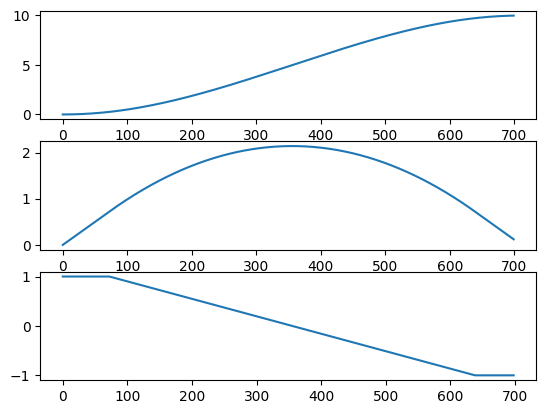

In [4]:
# Problem 1 Plotting

x_sol = x_opt[0, :]
xdot_sol = x_opt[1, :]
u_sol = u_opt

plt.subplot(3, 1, 1)
plt.plot(x_sol)
plt.subplot(3, 1, 2)
plt.plot(xdot_sol)
plt.subplot(3, 1, 3)
plt.plot(u_sol)
plt.show()


In [11]:
# Problem 2 Setup

# Initial Conditions
t0 = 0
m0 = 0
p0 = 0

# Final Conditions
tf = 5
mf = 0
pf = 5

# Dynamics Parameters
a0 = 1
delta = 1
k = 1
gamma = 1

# Discretization Information
dt = 0.01
T = int((tf-t0)/dt)

A = np.array([[-delta, 0],[k, -gamma]])
b = np.array([[1], [0]])
constant = np.array([[a0], [0]])


In [12]:
# Problem 2 Optimization

# Define our optimization problem object using ca.Opti()
opti_p2 = ca.Opti()
x = opti_p2.variable(2, T)
v = opti_p2.variable(T-1)

# TODO Add initial condition (and final condition?) constraints
opti_p2.subject_to(x[0, 0] == m0)
opti_p2.subject_to(x[1, 0] == p0)
opti_p2.subject_to(x[0, T-1] == mf)
opti_p2.subject_to(x[1, T-1] == pf)

for i in range(T-1):
  # TODO Add input constraints
  opti_p2.subject_to(v[i] <= 10)
  opti_p2.subject_to(-v[i] <= 10)

  mi = x[0, i]
  pi = x[1, i]

  # TODO Add dynamics constraints
  opti_p2.subject_to(x[:, i+1] == x[:, i] + (A@x[:, i] +  b@v[i] + constant) * dt)



q = 1000
r = 1

# Ensure our final state is close to the goal
# final state cost not needed due to constraints on x[0, T-1] and x[1, T-1]
#final_state_cost = q*(x[:, T-1] - ca.vertcat(mf, pf)).T@(x[:, T-1] - ca.vertcat(mf, pf))

# Ensure we minimize our input
input_cost = r*v.T@v

#cost = final_state_cost + input_cost # TODO Add cost function and tell the solver to minimize it
cost = input_cost
opti_p2.minimize(cost)

option = {"verbose": False, "ipopt.print_level": 0, "print_time": 0} #You can change verbose to T/F to change how much gets printed

opti_p2.solver("ipopt", option)

sol = opti_p2.solve()

x_opt = sol.value(x)
u_opt = sol.value(v)


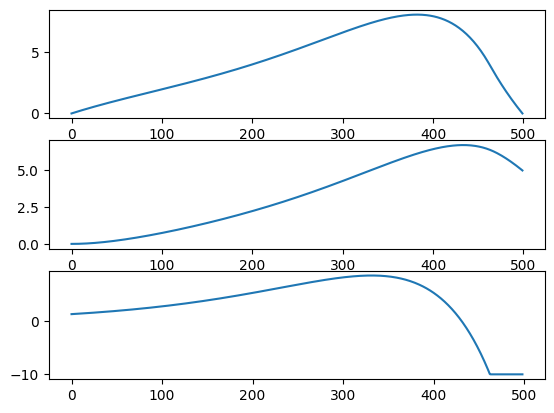

In [13]:
# Problem 2 Plotting

x_sol = x_opt[0, :]
xdot_sol = x_opt[1, :]
u_sol = u_opt

plt.subplot(3, 1, 1)
plt.plot(x_sol)
plt.subplot(3, 1, 2)
plt.plot(xdot_sol)
plt.subplot(3, 1, 3)
plt.plot(u_sol)
plt.show()

In [8]:
# Problem 3 Setup

# Initial Conditions
t0 = 0
x0, y0, theta0, vx0 = 0, 0, 0, 0

# Final Conditions
tf = 10
xf, yf, thetaf, vxf = 5, 5, 0, 0

# Obstacle Parameters (circle of radius 1 centered at (2, 1))
x_obs = 2
y_obs = 1
r_obs = 1

# Wheelbase of Vehicle
l = 0.5

# Discretization Parameters
dt = 0.01
T = int((tf-t0)/dt)


In [9]:
# Problem 3 Optimization

# TODO Define optimization problem
opti_p3 = ca.Opti()
x = opti_p3.variable(4, T)
u = opti_p3.variable(2, T-1)

# TODO Initial state constraints
opti_p3.subject_to(x[0, 0] == x0)
opti_p3.subject_to(x[1, 0] == y0)
opti_p3.subject_to(x[2, 0] == theta0)
opti_p3.subject_to(x[3, 0] == vx0)

# Dynamics and control constraints
for i in range(T-1):
    x_i = x[0, i]
    y_i = x[1, i]
    theta_i = x[2, i]
    vx_i = x[3, i]
    u1_i = u[0, i] # u_delta
    u2_i = u[1, i] # u_v

    # TODO Dynamics constriants using control inputs u1_i and u2_i
    opti_p3.subject_to(x[0, i+1] == x_i + np.cos(theta_i) * vx_i * dt)
    opti_p3.subject_to(x[1, i+1] == y_i + np.sin(theta_i) * vx_i * dt)
    opti_p3.subject_to(x[2, i+1] == theta_i + (vx_i/l) * np.tan(u1_i) * dt)
    opti_p3.subject_to(x[3, i+1] == vx_i + u2_i * dt)

    # TODO Obstacle avoidance constraint
    S_i = ca.vertcat(x_i - (l/2) * np.cos(theta_i), y_i - (l/2) * np.sin(theta_i))
    F_i = ca.vertcat(x_i + (l/2) * np.cos(theta_i), y_i + (l/2) * np.sin(theta_i))
    C = ca.vertcat(x_obs, y_obs)
    r = 1
    SC = C - S_i
    SF = F_i - S_i

    proj_scalar = ca.fmax(0, ca.fmin(1, ca.dot(SC, SF)/ ca.dot(SF, SF)))
    proj = S_i + proj_scalar * SF
    d = ca.norm_2(C - proj)
    # NOTE: 1.1 * r is used to create additional distance between car and circle
    opti_p3.subject_to(d > 1.1*r)



# Define weights for cost function components (tune as necessary to get a good looking trajectory )
w1, w2 = 0.1, 0.1  # Weights for control inputs
q1, q2 = 100.0, 100.0  # Weights for position error

# Define cost function as sum of state and input costs, and tell solver to minimize it
Q = ca.diag([q1, q2])
final_state_cost = (x[0:2, T-1] - ca.vertcat(xf, yf)).T @ Q @ (x[0:2, T-1] - ca.vertcat(xf, yf))

R = ca.diag([w1, w2])
input_cost = 0
for i in range(T-1):
    input_cost += (u[:, i].T @ R @ u[:, i])

cost = final_state_cost + input_cost # TODO Add cost function and tell the solver to minimize it
opti_p3.minimize(cost)

# TODO Set solver options, solve the problem, then retrieve optimal values
option = {"verbose": False, "ipopt.print_level": 0, "print_time": 0} #You can change verbose to T/F to change how much gets printed

opti_p3.solver("ipopt", option)

sol = opti_p3.solve()
x_opt = sol.value(x)
u_opt = sol.value(u)

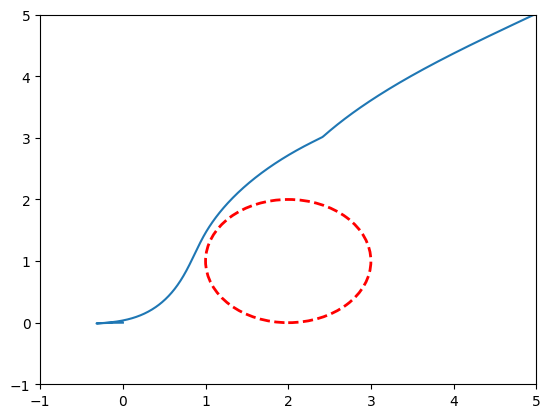

In [10]:
# Problem 3 Plotting

import matplotlib.patches as patches

fig, ax = plt.subplots()

x_values = x_opt[0, :]
y_values = x_opt[1, :]

circle1 = patches.Circle((x_obs, y_obs), 1, color='red', fill=False, linestyle='--', linewidth=2)
plt.plot(x_values, y_values)
ax.add_patch(circle1)
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
plt.show()